# Exercício - Implementação do Perceptron

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from utils import gen_2D_gaussians

In [2]:
class myPerceptron:
    def __init__(self, X: np.ndarray, Y: np.ndarray, eta: float, tol: float, max_epochs: int, par=1) -> None:
        """
        Perceptron class. Adjust model weight based on training data.

        Parameters:
        X (ndarray): input data
        Y (ndarray): target labels
        eta (float): learning rate
        tol (float): error tolerance
        max_epochs (int): maximum number of epochs
        """
        if par == 1:
            # Add bias term to the input data
            w = np.random.randn(X.shape[1] + 1)
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        else:
            w = np.random.randn(X.shape[1])
        
        N = len(X)
        self.error_epoch = [tol + 1]
        self.n_epoch = [0]
        
        while self.n_epoch[-1] < max_epochs and self.error_epoch[-1] > tol:
            xseq = np.random.permutation(N)
            ei2 = 0

            for i in range(N):
                i_rand = xseq[i]
                err = Y[i_rand] - np.sign(np.dot(w, X[i_rand, :]))
                w += eta * err * X[i_rand, :]
                ei2 += err ** 2
            self.error_epoch.append(ei2)
            self.n_epoch.append(self.n_epoch[-1] + 1)
        
        self.weights = w

    def predict(self, sample: np.ndarray, par=1) -> np.ndarray:
        """
        Predict sample class.

        Parameters:
        sample (ndarray): input data
        """
        if par == 1:
            # Add bias term to the input data
            sample = np.hstack(((1,), sample))
        output = np.dot(sample, self.weights)
        return 1 if output >= 0 else 0

# Geração de duas classes gaussianas sintéticas

Text(0.5, 1.0, 'Dataset sintético: Gaussianas 2D com s = 0.3')

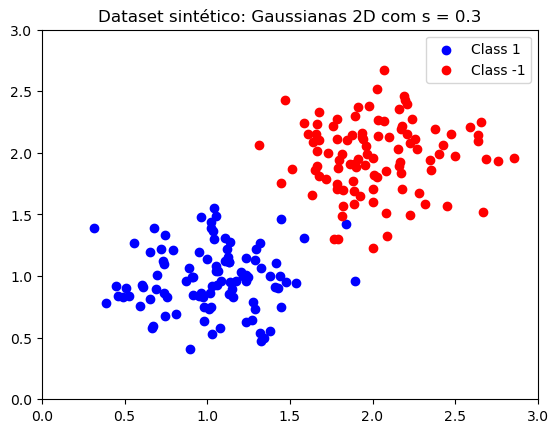

In [3]:
np.random.seed(321)
X, Y = gen_2D_gaussians()

plt.scatter(X[:100, 0], X[:100, 1], c='b', label='Class 1')
plt.scatter(X[100:, 0], X[100:, 1], c='r', label='Class -1')
plt.legend()
plt.xlim(0,3)
plt.ylim(0,3)
plt.title('Dataset sintético: Gaussianas 2D com s = 0.3')


Text(0.5, 1.0, 'Erro de treinamento ao longo das épocas')

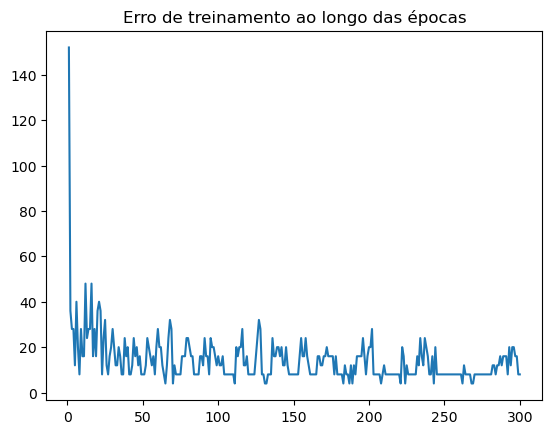

In [4]:
# Perceptron Training
perceptron = myPerceptron(X, Y, eta=0.1, tol=0.01, max_epochs=300)

# Plot error over each epoch (desconsidering first epoch)
plt.plot(perceptron.n_epoch[1:], perceptron.error_epoch[1:]) 
plt.title('Erro de treinamento ao longo das épocas')

# Separação da Superfíce pelo Perceptron

Text(0.5, 1.0, 'Superfície separada pelo perceptron')

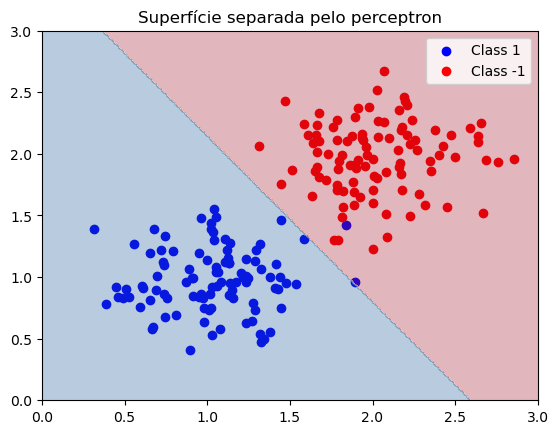

In [5]:
seqi = np.linspace(0, 3, 300)
seqj = np.linspace(0, 3, 300)
M1 = np.zeros((len(seqi), len(seqj)))
for i in range(len(seqi)):
    for j in range(len(seqj)):
        M1[i, j] = perceptron.predict(np.array([seqi[i], seqj[j]]))

plt.scatter(X[:100, 0], X[:100, 1], c='b', label='Class 1')
plt.scatter(X[100:, 0], X[100:, 1], c='r', label='Class -1')
plt.legend()
plt.xlim(0,3)
plt.ylim(0,3)
plt.contourf(seqi, seqj, M1, alpha=0.3, cmap=plt.cm.RdBu)
plt.title('Superfície separada pelo perceptron')

# Exercício: Dataset BreastCancer

## Carregando o dataset

In [12]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

X = breast_cancer_data.data
y = breast_cancer_data.target

print("Forma dos dados:", X.shape)  # (569, 30) - 569 amostras com 30 características
print("Forma do alvo:", y.shape)    # (569,) - 569 rótulos de classe

print("Nomes das características:", breast_cancer_data.feature_names)
print("Nomes das classes:", breast_cancer_data.target_names)  # [0 = 'malignant', 1 = 'benign']

Forma dos dados: (569, 30)
Forma do alvo: (569,)
Nomes das características: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Nomes das classes: ['malignant' 'benign']


## Separação em conjuntos para Validação Cruzada

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc_list = []
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    perceptron = myPerceptron(X_train, y_train, eta = 0.1, tol = 0.1, max_epochs = 1000)
    
    y_predicted = [perceptron.predict(xi) for xi in X_test]
    accuracy = accuracy_score(y_test, y_predicted)
    acc_list.append(accuracy)
    
    print(f"Fold {fold}:")
    print(f"  Train samples: {len(train_index)}, Test samples: {len(test_index)}")
    print(f"  Model Accuracy:{100*accuracy:.2f}%")

Fold 1:
  Train samples: 512, Test samples: 57
  Model Accuracy:61.40%
Fold 2:
  Train samples: 512, Test samples: 57
  Model Accuracy:63.16%
Fold 3:
  Train samples: 512, Test samples: 57
  Model Accuracy:57.89%
Fold 4:
  Train samples: 512, Test samples: 57
  Model Accuracy:84.21%
Fold 5:
  Train samples: 512, Test samples: 57
  Model Accuracy:63.16%
Fold 6:
  Train samples: 512, Test samples: 57
  Model Accuracy:89.47%
Fold 7:
  Train samples: 512, Test samples: 57
  Model Accuracy:63.16%
Fold 8:
  Train samples: 512, Test samples: 57
  Model Accuracy:63.16%
Fold 9:
  Train samples: 512, Test samples: 57
  Model Accuracy:87.72%
Fold 10:
  Train samples: 513, Test samples: 56
  Model Accuracy:89.29%


## Cálculo da Acurácia Média e Desvio Padrão

In [11]:
mean_accuracy = sum(acc_list)/len(acc_list)
variance = sum((x - mean_accuracy) ** 2 for x in acc_list) / len(acc_list)
std_dev = np.sqrt(variance)
print(f"Acurácia Média: {100*mean_accuracy:.2f}%\nStandard Deviation: {100*std_dev:.2f}%")

Acurácia Média: 72.26%
Standard Deviation: 12.74%
